### Model Interpretability

# **Contextual Introduction**
This notebook focuses on analyzing the "Smoking and Drinking Health Study" dataset, which gathers information on individuals' smoking and drinking habits alongside various health metrics. The primary goal is to uncover patterns and potential health impacts associated with these behaviors.

# Data Loading and Initial Exploration (Code Cell)


In [1]:
import pandas as pd
dataset_path = '/content/smoking_driking_dataset_Ver01 4.csv'
data = pd.read_csv(dataset_path)
data.head(), data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

(    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
 0  Male   35     170      75       90.0         1.0          1.0        1.0   
 1  Male   30     180      80       89.0         0.9          1.2        1.0   
 2  Male   40     165      75       91.0         1.2          1.5        1.0   
 3  Male   50     175      80       91.0         1.5          1.2        1.0   
 4  Male   50     165      60       80.0         1.0          1.2        1.0   
 
    hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
 0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
 1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
 2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
 3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
 4         1.0  138.0  ...      117.0         104.0        13.8            1.0   
 
    serum_creatinine  SG

# Data Preprocessing for Machine Learning
One-Hot Encoding of Categorical Variables
To prepare our dataset for machine learning models, we first need to convert categorical variables into a format that can be provided to the models. Machine learning models generally require numerical input, so categorical variables are transformed using one-hot encoding. This process converts categorical variables into binary (0 or 1) columns for each category:

Sex: Originally a categorical variable indicating gender, is transformed into two columns: 'Male' and 'Female', using one-hot encoding.
Drinking Status (DRK_YN): Indicates whether the individual consumes alcohol. This is encoded into a binary column where 1 represents 'Yes' (drinking) and 0 represents 'No' (not drinking).
Feature Selection and Target Variable Definition
After encoding, we define our features (X) and target variable (y) for the analysis:

Features (X): All columns except 'SMK_stat_type_cd', which is our target variable, constitute the feature set. These features will be used to predict the target.
Target Variable (y): 'SMK_stat_type_cd' represents the smoking status type code of individuals, serving as the target variable for our predictive model.
Splitting the Dataset into Training and Testing Sets
The dataset is split into training and testing sets to evaluate the performance of our machine learning models. This split allows us to train our models on a portion of the data (training set) and then test their performance on unseen data (testing set), ensuring that our models generalize well to new data:

Training Set: Used to train the machine learning models. It consists of 80% of the data.
Testing Set: Used to evaluate the models' performance. It consists of the remaining 20% of the data.
The train_test_split function from sklearn.model_selection is used for this purpose, with a test_size of 0.2, indicating that 20% of the data is reserved for the test set. The random_state parameter is set to 42 to ensure reproducibility of the split.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables using sparse_output for compatibility
encoder = OneHotEncoder(sparse_output=False)
encoded_sex = encoder.fit_transform(data[['sex']])
encoded_drk_yn = encoder.fit_transform(data[['DRK_YN']])

# Create a new DataFrame with encoded columns
encoded_columns = pd.DataFrame(encoded_sex, columns=['Male', 'Female'])
encoded_columns['DRK_YN'] = encoded_drk_yn[:, 1]  # Assuming 1 corresponds to "Yes" for DRK_YN

# Drop original categorical columns and concatenate encoded columns
data_preprocessed = data.drop(['sex', 'DRK_YN'], axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded_columns], axis=1)

# Define the target variable and features
X = data_preprocessed.drop('SMK_stat_type_cd', axis=1)  # Drop the new target variable to create the feature set
y = data_preprocessed['SMK_stat_type_cd']  # New target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(793076, 24) (198270, 24) (793076,) (198270,)


#  Fitting a linear model and interpreting the regression coefficients -Logistic Regression for Multi-Class Classification
Overview:
We utilize Logistic Regression, a fundamental machine learning algorithm, to address a multi-class classification problem. This type of model is adept at predicting the probability that a given input belongs to one of several categories.

Model Initialization
The LogisticRegression model from Scikit-learn is initialized with specific parameters to tailor it for multi-class classification:

max_iter=1000: Increases the number of iterations to ensure convergence, especially necessary for complex datasets.
multi_class='multinomial': Specifies that we are dealing with a multi-class problem, using the softmax function to predict probabilities across multiple classes.
solver='lbfgs': Chooses the optimizer for solving the model equations. 'lbfgs' is efficient for datasets of moderate size and complexity.
Model Training
The model is trained on preprocessed feature data (X_train) and target labels (y_train), learning to associate the input features with the corresponding class labels.

Coefficients and Intercept Extraction
After training, we extract the model's coefficients and intercepts:

Coefficients: Represent the relationship between each feature and the likelihood of belonging to each class. The shape [n_classes, n_features] indicates a separate coefficient set for each class.
Intercepts: The baseline log-odds of each class when all input features are zero.
Structuring Coefficient Data
To facilitate interpretation, we organize the coefficients into pandas DataFrames, associating each feature with its coefficient in predicting each class. This helps in understanding the influence of each feature on the model's predictions across different classes.

Visualization and Interpretation
The final step involves examining the coefficients for each class:

Coefficients With Features Class 0-2: These DataFrames show how changes in each feature value are expected to influence the log-odds of the data point belonging to each respective class, providing insights into the features' importance and impact.


In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd


# Initialize the Logistic Regression model for multi-class classification
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Retrieve the coefficients and the intercept
coefficients = logistic_model.coef_
intercepts = logistic_model.intercept_

feature_names = X_train.columns.tolist()

coefficients_with_features_class_0 = pd.DataFrame(list(zip(feature_names, coefficients[0])), columns=['Feature', 'Coefficient Class 0'])
coefficients_with_features_class_1 = pd.DataFrame(list(zip(feature_names, coefficients[1])), columns=['Feature', 'Coefficient Class 1'])
coefficients_with_features_class_2 = pd.DataFrame(list(zip(feature_names, coefficients[2])), columns=['Feature', 'Coefficient Class 2'])

coefficients_with_features_class_0, coefficients_with_features_class_1, coefficients_with_features_class_2, intercepts


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(             Feature  Coefficient Class 0
 0                age            -0.003314
 1             height             0.005644
 2             weight            -0.006025
 3          waistline             0.007624
 4         sight_left             0.021412
 5        sight_right             0.022827
 6          hear_left             0.083373
 7         hear_right             0.087453
 8                SBP             0.008842
 9                DBP            -0.004487
 10              BLDS            -0.000798
 11         tot_chole            -0.003592
 12         HDL_chole             0.006517
 13         LDL_chole             0.004252
 14      triglyceride            -0.000519
 15        hemoglobin            -0.045313
 16     urine_protein            -0.010061
 17  serum_creatinine             0.047629
 18          SGOT_AST             0.001146
 19          SGOT_ALT             0.001196
 20         gamma_GTP            -0.002695
 21              Male             1.116206
 22        

# Logistic Regression Model Training and Coefficients Analysis

The model provides coefficients for each class (3 classes in total), which are then organized into separate data frames for analysis. The coefficients indicate the relationship between each feature and the likelihood of the data points belonging to each class. For instance, the feature 'age' has a negative coefficient for Class 0, suggesting that as 'age' increases, the likelihood of the data points belonging to Class 0 decreases.

The coefficients and intercepts (the bias for each class) have been successfully extracted, as shown in the arrays at the end of the output. The intercepts array contains bias terms for each class.

This output can be used to interpret the model.


# Fitting a tree-based model and interpreting the nodes - RandomForestClassifier
A powerful ensemble model that combines multiple decision trees to improve prediction accuracy and prevent overfitting. Key settings include:

n_estimators=50: Limits the forest to 50 trees, balancing between prediction performance and computational efficiency.
max_depth=10: Restricts trees to a maximum depth of 10, preventing overly complex models that are hard to interpret and might overfit.
max_features='sqrt': At each split, considers the square root of the number of features, reducing variance and improving generalization.
n_jobs=-1: Utilizes all available CPU cores for faster training.
random_state=42: Ensures reproducible results by initializing the internal random number generator in a consistent way.
After configuration, the model is trained with X_train and y_train, making it ready to predict or evaluate its performance on unseen data. This setup offers a practical starting point for classification tasks, striking a balance between predictive accuracy and computational demand.







In [4]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

The below code performs prediction and feature importance analysis using a trained RandomForestClassifier. Here’s a concise explanation:

Predictions: The random_forest_model.predict(X_test) method is used to generate predictions for the test dataset (X_test), which can then be compared to the actual values (y_test) to evaluate the model's performance.

Feature Importances: The model's feature_importances_ attribute provides a measure of the importance of each feature in the prediction process. It highlights how much each feature contributes to the decision-making process of the model.

Sorting and Displaying Feature Importances: A DataFrame named importances_with_features is created to list each feature alongside its importance score, sorted in descending order of importance. This ranking helps identify which features have the most significant impact on the model's predictions.

In [5]:
predictions = random_forest_model.predict(X_test)
feature_importances = random_forest_model.feature_importances_
importances_with_features = pd.DataFrame(sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])
print(importances_with_features)

             Feature  Importance
0               Male    0.353629
1             Female    0.212757
2             height    0.085027
3             DRK_YN    0.067689
4         hemoglobin    0.062162
5   serum_creatinine    0.048243
6                age    0.042895
7          gamma_GTP    0.038249
8             weight    0.033607
9       triglyceride    0.014090
10         waistline    0.009947
11          SGOT_ALT    0.006635
12         HDL_chole    0.006413
13          SGOT_AST    0.003940
14              BLDS    0.002807
15         LDL_chole    0.002777
16               SBP    0.002747
17         tot_chole    0.002159
18               DBP    0.001874
19        sight_left    0.000982
20       sight_right    0.000880
21     urine_protein    0.000208
22         hear_left    0.000148
23        hear_right    0.000133



The below code visualizes the first decision tree from a RandomForestClassifier. It uses plot_tree to display the tree structure with specified feature names up to a depth of 3 levels, enhancing interpretability. The nodes are color-coded by the majority class, and the figure size is set for clear visualization. This helps in understanding how individual trees within the ensemble make decisions based on input features.

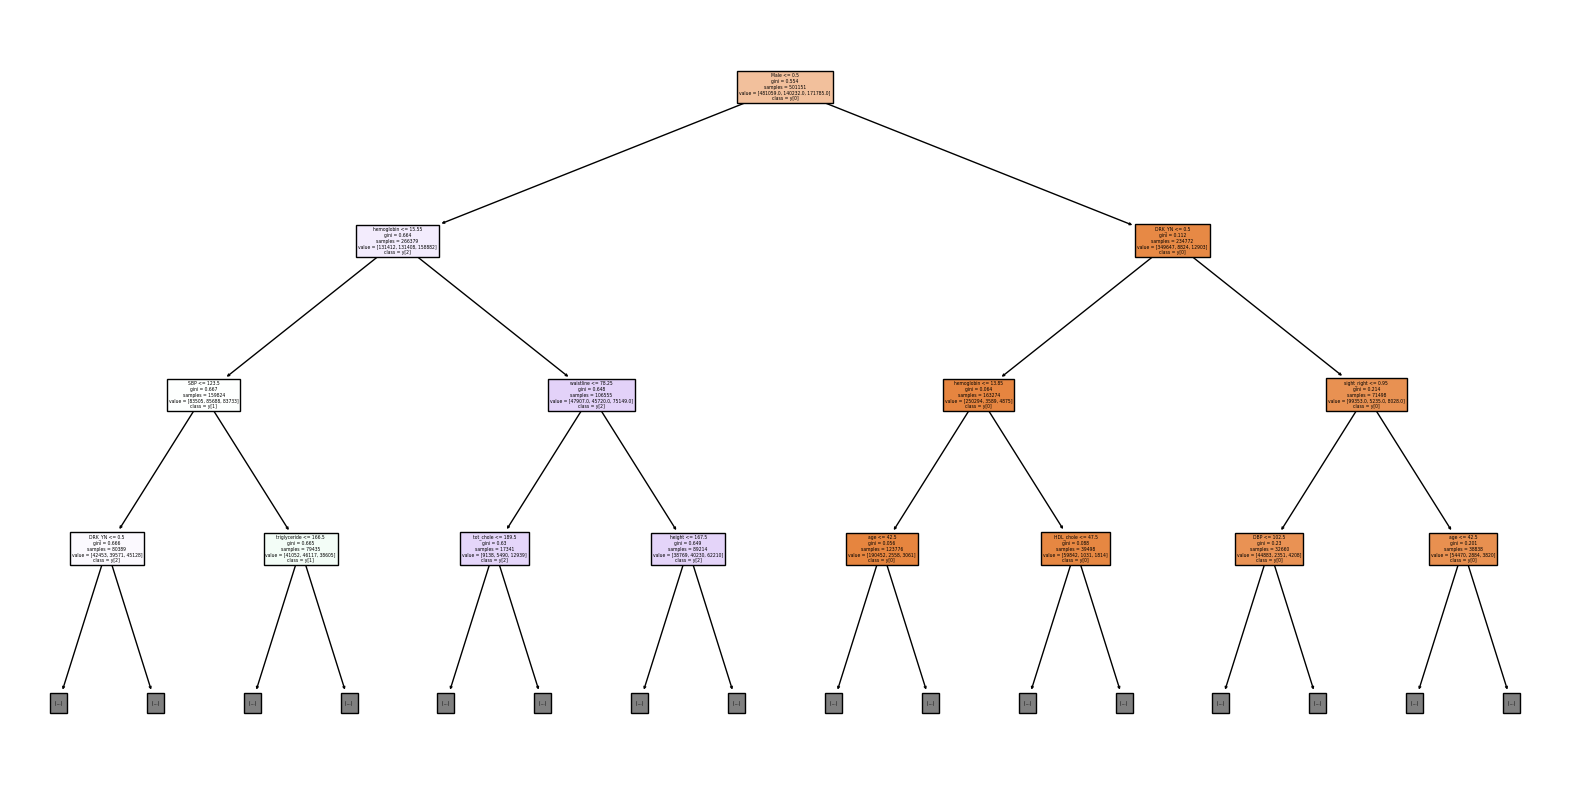

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

single_tree = random_forest_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=X_train.columns, class_names=True, filled=True, max_depth=3)
plt.show()



The picture represents a visualization of the first decision tree from a RandomForestClassifier. It illustrates how the algorithm splits the data into different paths based on feature values to make predictions. Each node in the tree contains a condition or decision rule that splits the data, with the topmost node being the root of the tree.

The nodes are color-coded to show the dominant class after the split, and within each node, several statistics might be displayed, such as the gini impurity, the number of samples at that node, and the class distribution of those samples. The leaves (terminal nodes) represent the decision outcomes, with each leaf typically assigned to the class most frequent among its samples.

This type of visualization is crucial for understanding how the decision tree makes predictions and can be used to interpret the model's decision-making process. It offers insights into which features are more important and how they interact to lead to a particular prediction

In [7]:
!pip uninstall scikit-learn
!pip install scikit-learn>=0.22.0,<0.24.0
!pip install tpot
!pip install numpy
# !pip install --upgrade numpy scikit-learn tpot

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.1.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.4.1.post1
/bin/bash: line 1: 0.24.0: No such file or directory
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


# Quick Model Exploration with TPOT AutoML and using it for finding out the best model
This code installs and utilizes TPOT, an AutoML tool, to quickly explore and identify the best machine learning pipeline for a given dataset. It samples a smaller subset of the training data for speed, converts it to NumPy arrays, and then employs TPOTClassifier with reduced settings for rapid execution. The best pipeline found is evaluated on the test data, and the optimal model pipeline is exported to a Python script for future use.

In [8]:

from tpot import TPOTClassifier
import numpy as np
import pandas as pd

# Sample a smaller subset of your data for quick exploration
# Adjust `frac` to change the subset size, e.g., 0.1 for 10%
X_train_sampled = X_train.sample(frac=0.1, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# Convert training and testing data to numpy arrays and specify dtype explicitly
X_train_np = np.array(X_train_sampled, dtype=np.float64, copy=True)
y_train_np = np.array(y_train_sampled, dtype=np.int32, copy=True)

# Ensure the arrays are writeable
X_train_np.setflags(write=1)
y_train_np.setflags(write=1)

# Initialize TPOTClassifier with further reduced settings for very fast execution
tpot_classifier = TPOTClassifier(
    generations=1,  # Kept at 1 for very quick results
    population_size=5,  # Kept low for quick exploration
    verbosity=2,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    cv=3  # Reduced from default 5 to 3 for quicker cross-validation
)

# Fit TPOTClassifier to the training data
tpot_classifier.fit(X_train_np, y_train_np)

# Evaluate the best pipeline found on the test data
print("Best pipeline test score: ", tpot_classifier.score(X_test, y_test))

# Export the best model pipeline to a Python script
tpot_classifier.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6978615019922328

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Best pipeline test score:  0.702673122509709


# AutoML Run Result Summary
The AutoML process has completed its first generation, identifying a RandomForestClassifier with pre-processing by MinMaxScaler as the best pipeline, achieving a cross-validation score of approximately 0.698. The pipeline parameters include bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=8, min_samples_split=4, and n_estimators=100. When evaluated on the test set, this pipeline achieved a score of 0.703. A warning was issued during the process indicating that the MinMaxScaler was applied to data with feature names, but it was initially fitted to data without feature names. This mismatch should be rectified for consistency and to avoid potential data processing errors.

In [9]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.8 MB/s eta 0:00:00


PermutationExplainer explainer: 101it [00:30,  2.21it/s]


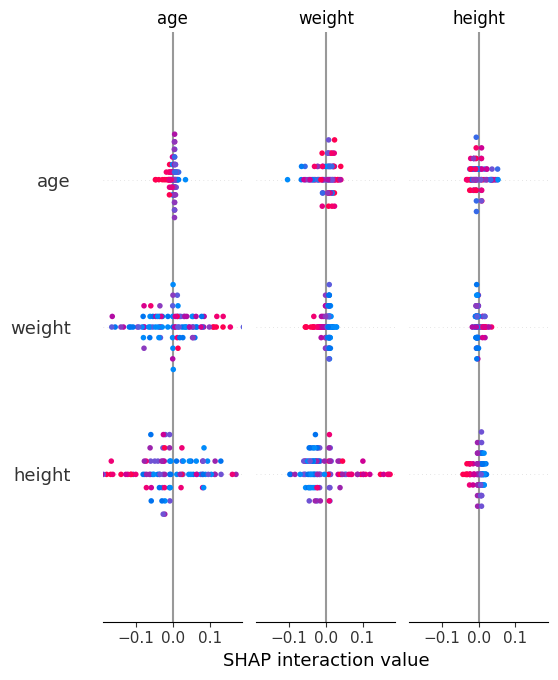

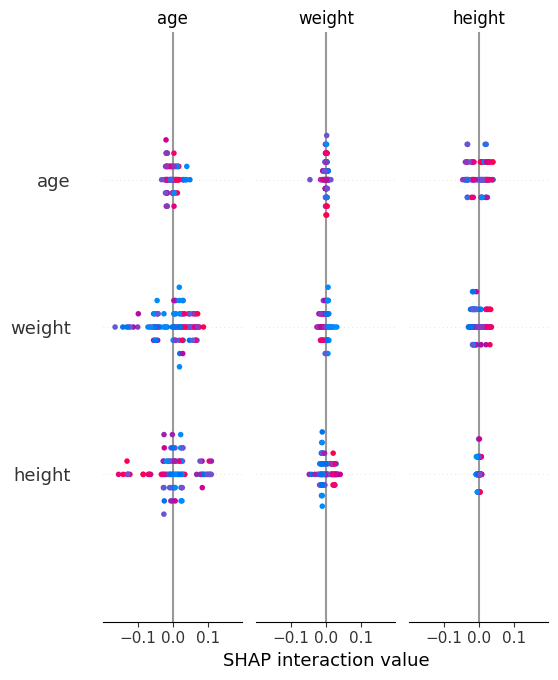

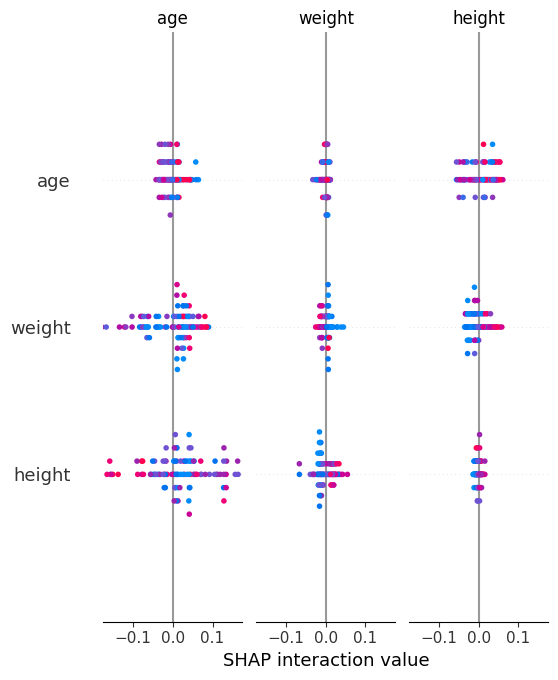

In [11]:
import shap


X_train_sample = shap.utils.sample(X_train, 50)
X_train_np_sample = shap.utils.sample(X_train_np, 50)  # For TPOT models

explainer_logistic = shap.Explainer(logistic_model.predict_proba, X_train_sample, algorithm="permutation")

explainer_tree = shap.Explainer(random_forest_model, X_train_sample)

explainer_automl = shap.Explainer(tpot_classifier.fitted_pipeline_.predict_proba, X_train_np_sample, algorithm="permutation")

X_test_sample = shap.utils.sample(X_test, 100)

shap_values_logistic = explainer_logistic(X_test_sample)
shap_values_tree = explainer_tree.shap_values(X_test_sample)
shap_values_automl = explainer_automl(X_test_sample)

shap.summary_plot(shap_values_logistic, X_test_sample, feature_names=X_test.columns)
shap.summary_plot(shap_values_tree, X_test_sample, feature_names=X_test.columns)
shap.summary_plot(shap_values_automl, X_test_sample, feature_names=X_test.columns)


# Interpretating the SHAP and comparing them with the other model interpretability methods.

The SHAP interaction value plots provided for the Logistic Regression, Random Forest Classifier, and AutoML models illustrate how pairs of features interact to impact the model's prediction. The SHAP interaction values on the y-axis represent the interaction effect between the feature on the y-axis and the feature on the x-axis. Positive values suggest a positive interaction effect, while negative values suggest a negative interaction effect.

Logistic Regression (1st Image): The plot shows the SHAP interaction values for the logistic regression model. It appears that certain interactions between features have more substantial effects on the model's predictions than others. For instance, the interaction between 'age' and 'weight' features seems to have a range of interaction effects, as indicated by the spread of the dots along the x-axis.

Random Forest Classifier (2nd Image): In the random forest model, the interaction effects seem to be more pronounced than in the logistic regression model, with a wider spread of SHAP interaction values. This suggests that the interactions between features in a random forest model may have a more significant impact on the model's output.

AutoML Model (3rd Image): The AutoML model plot, depending on the specific model selected by the AutoML process, also shows a variety of interaction effects. The nature of these interactions would depend on the complexity and type of model chosen by the AutoML framework.

Comparison with Other Interpretability Methods:

Coefficients (e.g., in linear models): Unlike SHAP values, coefficients from linear models like logistic regression provide a direct indication of the relationship between individual features and the prediction outcome, but they do not capture interaction effects between features.
Feature Importance (e.g., in tree-based models): Traditional feature importance scores give an overall importance for each feature but do not indicate the direction of the effect or interactions between features.
PDP (Partial Dependence Plots): These plots can show the effect of a single feature on the prediction outcome, averaged over the joint values of the other features, but they cannot show interactions.
SHAP interaction value plots offer a more nuanced view by allowing us to see not only the importance of individual features but also how pairs of features work together to influence the model prediction. This can be particularly valuable when the interaction between features plays a critical role in the model's decisions.

Interpretation and Actionable Insights:
The insights from SHAP analysis can inform feature engineering and the selection of model types based on how important feature interactions are for the predictive task at hand. For instance, if feature interactions are critical, models like tree-based models or neural networks that naturally capture these interactions might be preferable over linear models.

## Conclusion

The SHAP interaction plots for the Logistic Regression, Random Forest Classifier, and AutoML models suggest that each model captures different interaction effects between the features 'age,' 'weight,' and 'height.' The Logistic Regression model's interactions are relatively balanced, the Random Forest shows more variation in interaction strength, and the AutoML's interactions may depend on the underlying model selected by the framework. The SHAP values indicate how feature combinations affect the prediction output, providing insights into the complex relationships within the data that may not be captured by simpler interpretability methods.

## Licenses

The SHAP library is licensed under the MIT License. Full license details can be found in the SHAP GitHub repository.
The Logistic Regression and Random Forest Classifier models are part of the scikit-learn library, which is licensed under the BSD License.
TPOT, used for the AutoML model, is licensed under the LGPL-3.0 License.

## References
Lundberg, S. M., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. In Advances in Neural Information Processing Systems (pp. 4765–4774).
SHAP (SHapley Additive exPlanations). GitHub repository: https://github.com/slundberg/shap